# 12-Month Ecommerce Sales Data Analysis


Import Necessary Libraries

In [73]:
import pandas as pd
import os

Merge 12 months of data into one CSV file

In [74]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

Read new updated dataframe

In [75]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Question 1: What is the best month of sales? How much was earned that month?

Clean data: NaN values

In [76]:
all_data = all_data.dropna(how='all')

In [77]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Create new column that shows the month of purchase

In [78]:
all_data['Month Purchased'] = all_data['Order Date'].apply(lambda x: x.split('/')[0])

all_data = all_data[all_data['Month Purchased'] != 'Order Date']
all_data['Month Purchased'] = all_data['Month Purchased'].astype('int32')

In [79]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Purchased
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


Add column that shows sale price for the purchase made

In [80]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month Purchased   185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


Convert string data types "Price Each" and "Quantity Ordered" into int type

In [81]:
print(all_data.iloc[[517]])

    Order ID                   Product Quantity Ordered Price Each  \
520   177055  Lightning Charging Cable                1      14.95   

         Order Date                 Purchase Address  Month Purchased  
520  04/09/19 12:37  59 Forest St, Atlanta, GA 30301                4  


Clean data that has repeated coloumn names

In [82]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Purchased
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [83]:
all_data = all_data[all_data['Quantity Ordered'] != 'Quantity Ordered']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Purchased
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [84]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [85]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']

In [86]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Purchased,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [87]:
monthly_results = all_data.groupby('Month Purchased').sum()
monthly_results

C:\Users\ayanz\AppData\Local\Temp\ipykernel_8112\166581143.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_results = all_data.groupby('Month Purchased').sum()


,Quantity Ordered,Price Each,Sales
Month Purchased,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


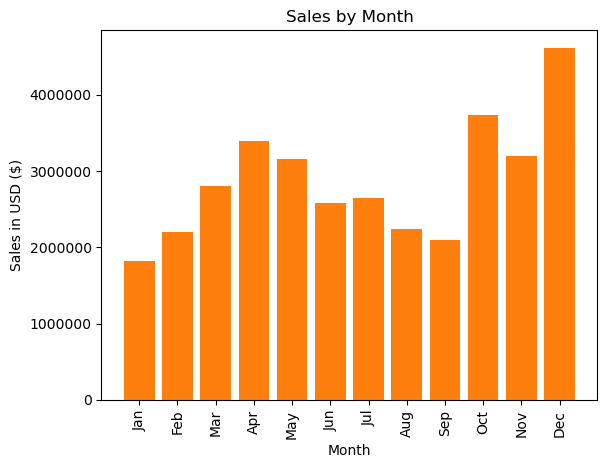

In [88]:
import matplotlib.pyplot as plt

x_months = range(1,13)
y_months = monthly_results

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.bar(x_months, y_months['Sales'], color = 'tab:orange')
plt.xticks(x_months, months, rotation='vertical')
plt.xlabel("Month")
plt.ylabel("Sales in USD ($)")

plt.title('Sales by Month')
plt.ticklabel_format(axis="y", style='plain') #to hide scientific notation labeled 'l6' above y-axis
plt.show()

## Question 2: Which City had the Highest Number of Sales?

In [89]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Purchased,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [90]:
all_data['Purchase Address']

0                    917 1st St, Dallas, TX 75001
2               682 Chestnut St, Boston, MA 02215
3            669 Spruce St, Los Angeles, CA 90001
4            669 Spruce St, Los Angeles, CA 90001
5               333 8th St, Los Angeles, CA 90001
                           ...                   
186845     840 Highland St, Los Angeles, CA 90001
186846    216 Dogwood St, San Francisco, CA 94016
186847       220 12th St, San Francisco, CA 94016
186848     511 Forest St, San Francisco, CA 94016
186849     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185950, dtype: object

In [91]:
def get_location(Address):
    city = ""
    state = ""
    city = Address.split(',')[1]
    state = Address.split(',')[2].split(' ')[1]
    location = city + ', ' + state
    return location
    

In [92]:
all_data['Location'] = all_data['Purchase Address'].apply(get_location)

In [93]:
total_sales = all_data.groupby('Location').sum('Sales')
total_sales

,Quantity Ordered,Price Each,Month Purchased,Sales
Location,,,,
"Atlanta, GA",16602,2779908.20,104794,2795498.58
"Austin, TX",11153,1809873.61,69829,1819581.75
"Boston, MA",22528,3637409.77,141112,3661642.01
"Dallas, TX",16730,2752627.82,104620,2767975.40
"Los Angeles, CA",33289,5421435.23,208325,5452570.80
"New York City, NY",27932,4635370.83,175741,4664317.43
"Portland, ME",2750,447189.25,17144,449758.27
"Portland, OR",11303,1860558.22,70621,1870732.34
"San Francisco, CA",50239,8211461.74,315520,8262203.91


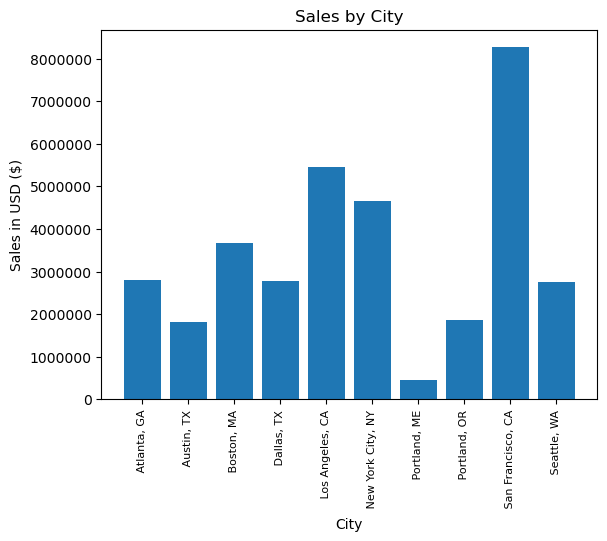

In [94]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('Location')]

plt.bar(cities, total_sales['Sales'])
plt.xticks(cities, rotation='vertical', size = 8)
plt.xlabel("City")
plt.ylabel("Sales in USD ($)")

plt.title('Sales by City')
plt.ticklabel_format(axis="y", style='plain') #to hide scientific notation labeled 'l6' above y-axis
plt.show()

## Question 3: What is the best time to display advertisements to maximize the likelihood of a customer buying a product?

In [95]:
all_data['Formatted Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour Time'] = all_data['Formatted Date'].dt.hour
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Purchased,Sales,Location,Formatted Date,Hour Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",2019-04-30 09:27:00,9
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,"Los Angeles, CA",2019-09-17 20:56:00,20
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,"San Francisco, CA",2019-09-01 16:00:00,16
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,"San Francisco, CA",2019-09-23 07:39:00,7
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,"San Francisco, CA",2019-09-19 17:30:00,17


In [96]:
all_data.groupby('Hour Time').sum('Sales')

,Quantity Ordered,Price Each,Month Purchased,Sales
Hour Time,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


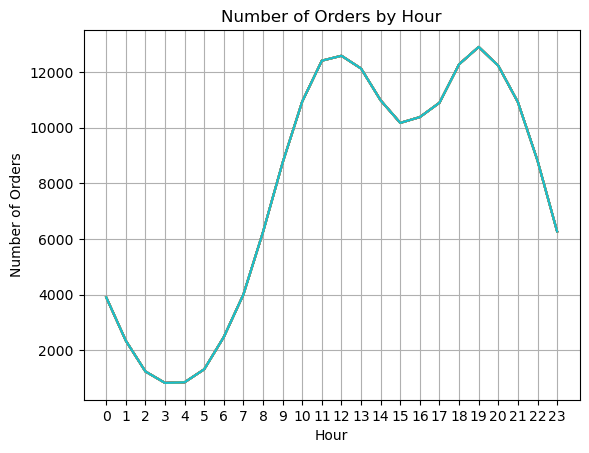

In [97]:
hours = [hour for hour, df in all_data.groupby('Hour Time')]
plt.plot(hours, all_data.groupby('Hour Time').count())

plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")

plt.title('Number of Orders by Hour')
plt.grid()
plt.show()

#### Since the number of orders peaks at 12pm and 7pm, those hours would be the best  time to display advertisements to maximize the likelihood of a customer buying a product.

## Question 4: Which products are most often sold together?

In [98]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [99]:
df['All Items Ordered'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'All Items Ordered']].drop_duplicates()
df

C:\Users\ayanz\AppData\Local\Temp\ipykernel_8112\3748419150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['All Items Ordered'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,All Items Ordered
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [100]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['All Items Ordered']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Question 5: What product sold the most? 

In [101]:
product_list = all_data.groupby('Product')['Quantity Ordered'].sum()

In [102]:
product_list.sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

C:\Users\ayanz\AppData\Local\Temp\ipykernel_8112\289665258.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = products_group.sum()['Quantity Ordered']


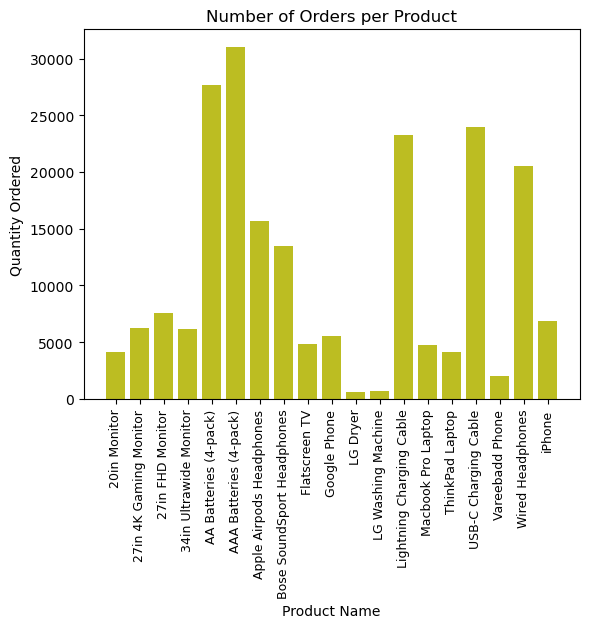

In [103]:
products_group = all_data.groupby('Product')
quantity_ordered = products_group.sum()['Quantity Ordered']

products = [product for product , df in products_group]
plt.bar(products, quantity_ordered, color = 'tab:olive')

plt.xticks(products, rotation = "vertical", size = 9)
plt.xlabel("Product Name")
plt.ylabel("Quantity Ordered")

plt.title('Number of Orders per Product')
plt.show()


C:\Users\ayanz\AppData\Local\Temp\ipykernel_8112\2900889929.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_price = all_data.groupby('Product').mean()['Price Each']
C:\Users\ayanz\AppData\Local\Temp\ipykernel_8112\2900889929.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(products, product_price, 'b-', color = 'tab:blue')
C:\Users\ayanz\AppData\Local\Temp\ipykernel_8112\2900889929.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical')


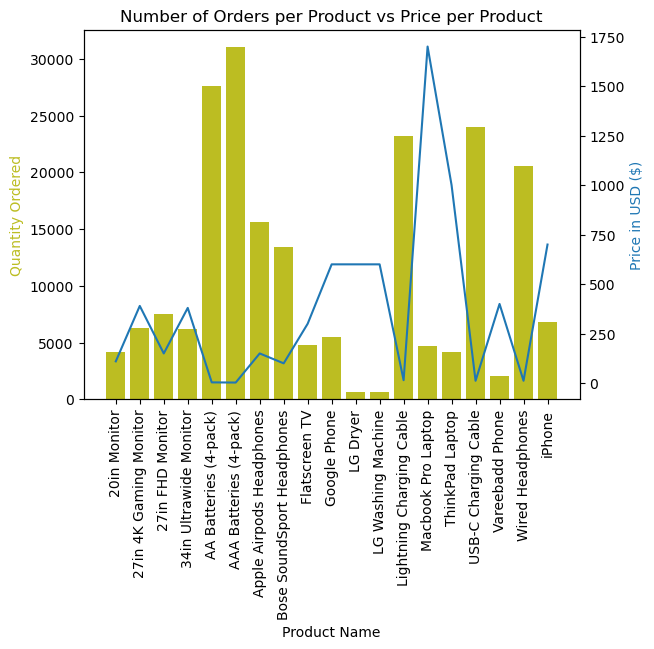

In [104]:
product_price = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'tab:olive')
ax2.plot(products, product_price, 'b-', color = 'tab:blue')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'tab:olive')
ax2.set_ylabel('Price in USD ($)', color = 'tab:blue')
ax1.set_xticklabels(products, rotation = 'vertical')

plt.title('Number of Orders per Product vs Price per Product')
plt.show()


Relatively when the price is low, the quantity ordered is high, and when the price is high, the quantity ordered is low. This is evident for the AAA battery (4-pack) where when the price is low, the quantity ordered is significantly greater compared to other products. The LG Dryer product has a high price, as a result, the quantity ordered is significantly lower compared to other products. However, there are some inconsistencies with this notion, and are evident for the flatscreen tv, Google phone, MacBook Pro Laptop, and ThinkPad Laptop products. Although the prices for these products are on the higher end, the quantity ordered is also higher compared to other products. 